# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

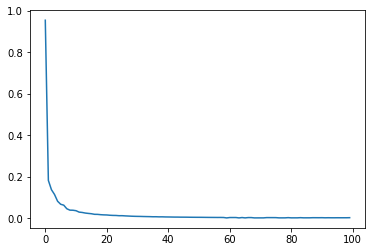

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)
#print(train_data[11])
import random
from numpy import linalg as LA
def calc(dig):
    
    arr = []
    cnt = 0
    for ind in range(6000):
        if train_labels[ind]==dig:
           arr.append(train_data[ind])
           cnt+=1
           if cnt==100:
                break
    cov_mat = np.cov(arr)
    eig_val,eig_vec = LA.eig(cov_mat)
    plt.plot(eig_val/LA.norm(eig_val))
    plt.show()
calc(4)

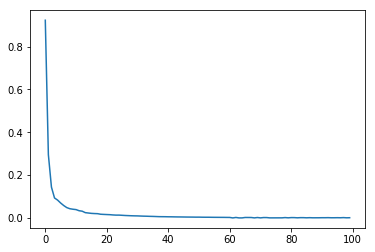

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
calc(5)


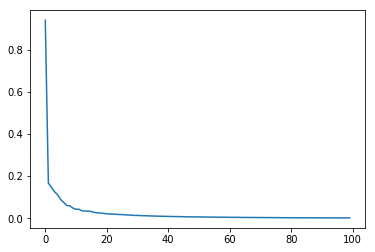

In [4]:
# All training data (plot c)
cov_mat = np.cov(train_data)
eig_val,eig_vec = LA.eig(cov_mat)
eig_val = eig_val.real
eig_val = eig_val/LA.norm(eig_val)
idx = np.argsort(-eig_val)
plt.plot(eig_val[idx[0:100]])
plt.show()

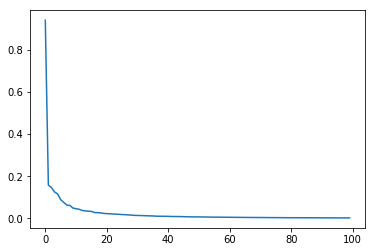

In [5]:
# Randomly selected 50% of the training data (plot d)
val = []
for i in range(3000):
    x = random.randint(0,5999)
    val.append(train_data[x])
cov_mat = np.cov(val)
eig_val , eig_vec = LA.eig(cov_mat)
eig_val = eig_val.real
eig_val = eig_val/LA.norm(eig_val)
idx = np.argsort(-eig_val)
plt.plot(eig_val[idx[0:100]])
plt.show()
    


### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)
1. No they aren't different as there is not much difference between eigen value spectrum of two digits.
2. Yes they are different since one plot contains the eigen value of all digits and one plot contains the eigen values of only one digit.
3. Ranks would be less than 784, since many eigen values will be around zero. Rough Estimate(of all the 4 plots) would be around 30-40.(when plotted by histogram)
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. Since the image is of size 784x784 and each cell of an image can be either 1 or 0. Since there are two values possible for each cell(image[i][j]). Therefore number of possible images are 2^(28*28) = 2^(784)
2. Percentage accessible = (700000)/(2^784)
3. Since the data would be present in all the directions therefore eigen vectors will be present in all directions and by taking any value we can get our data. Therefore all eigen values will be same.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)
The eigen spectrum doesn't change since we can consider othonormal matrix as a rotation on matrix A. Therefore only eigen vectors will be rotated. Hence there won't be change in eigen values 
---

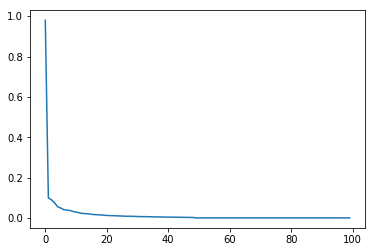

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
mat = np.random.randn(784, 50)
o_n,u_t  = np.linalg.qr(mat)
mat1 = np.matmul(train_data,o_n)
cov_mat = np.cov(mat1)
eig_val,eig_vec = LA.eig(cov_mat)
eig_val = eig_val.real
idx = np.argsort(-eig_val)
eig_val = eig_val[idx[0:100]]
eig_val = eig_val/LA.norm(eig_val)
plt.plot(eig_val.real)
plt.show()
# code goes here

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)
---
There will be atmost two eigen values(non-zero) depending on the rank of the matrix. Eigen Spectrum will have two peak values which will be non zero and the rest will be zero/(or)approaching to zero.


### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

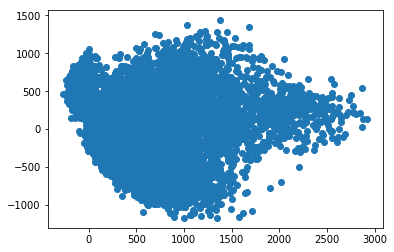

In [7]:
# Plotting cod-e here
cov_mat = np.cov(train_data.T)
eval,evec = LA.eig(cov_mat)
idx = np.argsort(-eval.real)
vec = evec[:,idx[0:2]]
data = np.matmul(train_data,vec.real)
plt.scatter(data[:,0],data[:,1])
# print(data.shape)
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using
import time
s = time.time()
from numpy import linalg as LA
import math
fmean = []
fcovmat = []
cov_mat = np.cov(train_data.T)
eval,evec = LA.eig(cov_mat)
idx = np.argsort(-(eval))
vec = (evec[:,idx[0:30]])
data = np.matmul(train_data,vec)
red_data = np.matmul(test_data,vec)
def mean_cov(A):
    mean_val = np.mean(A,axis=0)
    cov_val = np.cov(A.T)
    fmean.append(mean_val)
    fcovmat.append(np.linalg.inv(cov_val))
zero = np.zeros((600,30))
for k in range(10):
    cnt = 0 
    for j in range(6000):
        if train_labels[j]==k:
            zero[cnt]=data[j]
            cnt+=1
    mean_cov(zero)
end = time.time()
print(int(end-s))
    

1


/home/ishita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


In [9]:
start = time.time()
acc = 0;
for j in range(1000):
    cur = red_data[j]
    probs = [0]*10
    for k in range(10):
          det1 = np.linalg.det(fcovmat[k])
          det = 1/det1
          ft = np.matmul(fcovmat[k],(cur-fmean[k]).T)
          sd = np.matmul(cur-fmean[k],ft)
          num = np.exp(-0.5*sd)
          denom = ((2*math.pi)**15)*(np.sqrt(det))
          prob = num/denom
          probs[k]=prob.real
    ind = max(probs)
#     print(ind)
    label = probs.index(ind)
    if label==test_labels[j]:
        acc+=1
end = time.time()
print(end-start)

print((acc/1000)*100)



1.0685582160949707
94.8


In [10]:
#Print accuracy on the test set using MAP
acc = 0;
start = time.time()
for j in range(1000):
    cur = red_data[j]
    probs = [0]*10
    for k in range(10):
          det1 = np.linalg.det(fcovmat[k])
          det = 1/det1
          ft = np.matmul(fcovmat[k],(cur-fmean[k]).T)
          sd = np.matmul(cur-fmean[k],ft)
          num = np.exp(-0.5*sd)
          denom = ((2*math.pi)**15)*(np.sqrt(det))
          prob = (1/10)*(num/denom)
          probs[k]=prob.real
    ind = max(probs)
#     print(ind)
    label = probs.index(ind)
    if label==test_labels[j]:
        acc+=1
print((acc/1000)*100)
end = time.time()
print(end-start)
#The priori probability value is 10 because there are equally distributed classes for the current data. All are having 600 data points.
#(assume a reasonable prior and mention it in the comments)

94.8
1.1300885677337646


In [11]:
# Print accuracy using Bayesian pairwise majority voting method
start = time.time()
fmean = []
fcovmat = []
def mean_cov(A):
    mean_val = np.mean(A,axis=0)
    cov_val = np.cov(A.T)
    fmean.append(mean_val)
    fcovmat.append(cov_val)
zero = np.zeros((600,30))
for k in range(10):
    cnt = 0 
    for j in range(6000):
        if train_labels[j]==k:
            zero[cnt]=data[j]
            cnt+=1
    mean_cov(zero)

acc = 0
fcovmat1 = np.zeros((30,30))
for i in range(1000):
    cnt = [0]*10
    cur = red_data[i]
    for j in range(10):
        for k in range(j+1,10,1):
            mat = np.linalg.inv((fcovmat[k]+fcovmat[j])/2)
            ft = np.matmul(mat,cur-fmean[j])
            sd = np.matmul((cur-fmean[j]).T,ft) 
    
            ft1 = np.matmul(mat,cur-fmean[k])
            sd1 = np.matmul((cur-fmean[k]).T,ft1)
#             print(str(sd)+' '+str(sd1))
            if sd<sd1:
                cnt[j]+=1
            else:
                cnt[k]+=1
#             print(cnt)
    ind = max(cnt)
    label = cnt.index(ind)
#     print(label)
#     print(cnt)
    if label==test_labels[i]:
        acc+=1
print((acc/1000)*100)
end = time.time()
print(end-start)

/home/ishita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


88.4
6.953587293624878


In [12]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
start = time.time()
acc = 0
for i in range(1000):
    cnt = [0]*10
    cur = red_data[i]
    for j in range(10):
        for k in range(j+1,10,1):
            dist1 = np.matmul(cur-fmean[j],(cur-fmean[j]).T)
            dist2 = np.matmul(cur-fmean[k],(cur-fmean[k]).T)
            if dist1<dist2:
                cnt[j]+=1;
            else:
                cnt[k]+=1;
    ind = max(cnt)
    label = cnt.index(ind)
    if label==test_labels[i]:
        acc+=1
print((acc/1000)*100)
end = time.time()
print(end-start)

75.3
0.37097668647766113


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

1. MLE - Accuracy is 94.8%. Time - 0.4sec 
2. MPA - Accuracy is 94.8%. Time - 0.359sec
3. Bayesian Pairwise - Accuracy is 88.4%. Time - 2.317sec
4. Simple Perpendicular Bisectors - Accuracy is 75.3. Time - 0.256sec
MLE ~ MPA > Bayesian Pairwise > Simple Perpendicular Bisectors because MLE and MPA are more accurate in predicting the data as compared to bayesian pairwise and simple perpendicular bisectors. 
MLE and MPA are same because of uniformity in the probability. Therefore apriori is same for all.  
MLE uses the maximum likelihood principle along with Mahalanbois Distance thus it gives accurate results. But Bayesian Classifier uses only Mahalanbois Distance and hence gives less accurate results. For Perpendicular distance we are just using Eucledian Distance which is not such a good measure for higher dimensions. 

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [13]:
import math,time
start = time.time()
acc = 0
dist = np.sqrt(-2 * np.dot(test_data, train_data.T) + np.sum(train_data**2,    axis=1) + np.sum(test_data**2, axis=1)[:, np.newaxis])

# Your code here
def accuracy(K):
    acc = 0
    for i in range(1000):
        arr = [0]*10
        min1 = [1e9]*10
        arr1 = list(zip(dist[i],train_labels))
        data = sorted(arr1,key=lambda x:x[0])
        cnt = 0
        for j in range(K):
            cur = int(data[j][1])
            arr[cur]=arr[cur]+1
            min1[cur]=min(min1[cur],data[j][0])
        max_value = max(arr)
        cur_min = 1e9
        for j in range(K):
            cur = int(data[j][1])
            if arr[cur]==max_value:
                if min1[cur]<cur_min:
                    cur_min = min1[cur]
                    ind = data[j][1]
        if ind==test_labels[i]:
            acc+=1
    print((acc/1000)*100)
accuracy(1)
end = time.time()
print(end-start)
accuracy(3)
end1 = time.time()
print(end1-end)
accuracy(7)
end2 = time.time()
print(end2-end1)


# Print accuracies with K = 1, 3, 7

90.7
4.992602825164795
91.9
4.480839967727661
91.7
4.576600551605225


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)
If we increase the value of k we get many nearest neighbours and thus we will be able to predict our value correctly, But if we increase k by large value then our algorithm won't produce the correct result, since knn doesn't work well when we increase k.
For identifying the best K compute for all values from 1 to sqrt(n)(where n is number of dimensions) check where accuracy is maximum. The k corresponding to it is the best value of K.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [14]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [ ]:
dist = -2 * np.dot(train_data, train_data.T) + np.sum(train_data**2,    axis=1) + np.sum(train_data**2, axis=1)[:, np.newaxis]
# print(dist.shape)
out_dist = -2 * np.dot(mixed_data, train_data.T) + np.sum(train_data**2,    axis=1) + np.sum(mixed_data**2, axis=1)[:, np.newaxis]
start = time.time()
def accuracy(K):
    out_lier = 0
    ans = []
    for i in range(20):
        cnt = 0
        for j in range(6000):
            cur_dist = np.sort(dist[j])
            get_data = cur_dist[1:K+1]
            max_val = max(get_data)
            if out_dist[i][j]>max_val:
                cnt+=1
#         print(cnt)
        if cnt==6000:
            out_lier+=1
            ans.append(i)
    print(out_lier)
    print(ans)
        
accuracy(3)
end = time.time()
print(end-start)
accuracy(5)
end1 = time.time()
print(end1-end)
accuracy(7)
end2 = time.time()
print(end2-end1)
            


8
[0, 2, 4, 6, 7, 9, 11, 18]
45.24220156669617
7
[0, 4, 6, 7, 9, 11, 18]
45.279486894607544
5
[0, 4, 6, 9, 18]
45.43454694747925


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)
1. Find the k nearest neighbours for each test sample
2. Neatness Score = sum over all k nearest neighbours((weight)x(neatness of class ID)). Design weight as a decreasing function such that neighbour which are closest to training sample have high value than neighbours which are far. Here weight = 1/distance

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [ ]:
# Your code here
def mean_absolute_error(K):
    a = 0
    b = 0
    for i in range(1000):
        cur = test_data[i]
        cur = cur.reshape((1,784))
        arr = np.zeros((6000,784))
        arr[:]=cur
        dist = np.subtract(arr,train_data)
        dist = dist**2
        sum_arr = np.cumsum(dist,axis=1)
        value = np.sqrt(sum_arr[:,783])
        arr = list(zip(value,train_labels))
        data = sorted(arr,key=lambda x:x[0])
        x = data[0:K]
        val = 0
        val1 = 0
        min1 = 1/data[-1][0]
        max1 = 1/data[0][0]
        for j in range(K):
            cur = (1/x[j][0]-min1)/(max1-min1)
            val+= (cur)*(x[j][1]/10)
        cur = test_labels[i]/10
        a += abs(val/3-cur)
    print(a/1000)
mean_absolute_error(1)
mean_absolute_error(3)
mean_absolute_error(5)
mean_absolute_error(7)



    

0.30266666666666603
0.0647864064264827
0.22123972884282816


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---